In [1]:
# initial test to ensure that my notebook is working properly
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 9),
       ylim=(0, 8), yticks=np.arange(1, 9))

plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Setting up with necessary imports
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo

In [ ]:
df = pd.read_csv('../NASA MUREP/Spectral CDOM Repos and CSVs/Updated Sample CDOM Absorp Data.csv', sep=',')
df

,event,station,date,time,lon,lat,Pmax,Wavelength,ag_5m,ag_10m,...,ag_30m,ag_35m,ag_50m,ag_60m,ag_75m,ag_95m,ag_100m,ag_125m,ag_200m,ag_500m
0,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,250,0.881000,nd,...,nd,0.888000,0.858000,0.828000,nd,nd,nd,nd,nd,0.624000
1,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,251,0.858000,nd,...,nd,0.864000,0.834000,0.804000,nd,nd,nd,nd,nd,0.594000
2,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,252,0.837000,nd,...,nd,0.845000,0.813000,0.784000,nd,nd,nd,nd,nd,0.571000
3,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,253,0.819000,nd,...,nd,0.826000,0.794000,0.766000,nd,nd,nd,nd,nd,0.549000
4,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,254,0.802000,nd,...,nd,0.810000,0.777000,0.749000,nd,nd,nd,nd,nd,0.531000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,696,0.000516,nd,...,nd,0.000716,0.000727,0.000541,nd,nd,nd,nd,nd,0.000508
447,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,697,0.000397,nd,...,nd,0.000556,0.000566,0.000429,nd,nd,nd,nd,nd,0.000351
448,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,698,0.000255,nd,...,nd,0.000364,0.000373,0.000286,nd,nd,nd,nd,nd,0.000195
449,701508,CTD_03,20080310,1508,-38.555,-50.731667,500,699,0.000106,nd,...,nd,0.000153,0.000158,0.000120,nd,nd,nd,nd,nd,0.000084


In [3]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo



df = pd.read_csv('../NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_35m"]]  #df.loc['250':'700', ['Wavelength', 'ag_35m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_35m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 35 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_35m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'c.')

ModuleNotFoundError: No module named 'numpy'

In [7]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo
import numpy as np


df = pd.read_csv('../NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_50m"]]  #df.loc['250':'700', ['Wavelength', 'ag_50m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_50m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 50 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_50m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'r.')

ModuleNotFoundError: No module named 'pandas'

      Wavelength    ag_60m
0            250  8.28E-01
1            251  8.04E-01
2            252  7.84E-01
3            253  7.66E-01
4            254  7.49E-01
...          ...       ...
13585        698        nd
13586        699        nd
13587        700        nd
13588     Slopes        nd
13589      a_440        nd

[13590 rows x 2 columns]
      Wavelength    ag_60m
0            250  8.28E-01
1            251  8.04E-01
2            252  7.84E-01
3            253  7.66E-01
4            254  7.49E-01
...          ...       ...
13585        698       NaN
13586        699       NaN
13587        700       NaN
13588        NaN       NaN
13589        NaN       NaN

[13590 rows x 2 columns]
       Wavelength    ag_60m
0           250.0  0.828000
1           251.0  0.804000
2           252.0  0.784000
3           253.0  0.766000
4           254.0  0.749000
...           ...       ...
12677       696.0  0.000341
12678       697.0  0.000349
12679       698.0  0.000284
12680       699.0  0

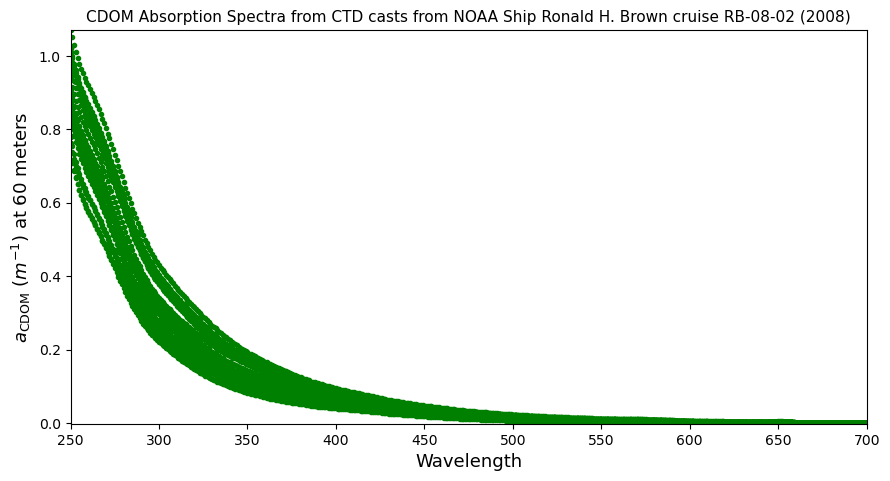

In [ ]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo



df = pd.read_csv('../NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_60m"]]  #df.loc['250':'700', ['Wavelength', 'ag_60m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_60m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 60 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_60m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'g.')

      Wavelength   ag_500m
0            250  6.24E-01
1            251  5.94E-01
2            252  5.71E-01
3            253  5.49E-01
4            254  5.31E-01
...          ...       ...
13585        698        nd
13586        699        nd
13587        700        nd
13588     Slopes        nd
13589      a_440        nd

[13590 rows x 2 columns]
      Wavelength   ag_500m
0            250  6.24E-01
1            251  5.94E-01
2            252  5.71E-01
3            253  5.49E-01
4            254  5.31E-01
...          ...       ...
13585        698       NaN
13586        699       NaN
13587        700       NaN
13588        NaN       NaN
13589        NaN       NaN

[13590 rows x 2 columns]
      Wavelength   ag_500m
0          250.0  0.624000
1          251.0  0.594000
2          252.0  0.571000
3          253.0  0.549000
4          254.0  0.531000
...          ...       ...
1352       696.0  0.000165
1353       697.0  0.000140
1354       698.0  0.000088
1355       699.0  0.000022
135

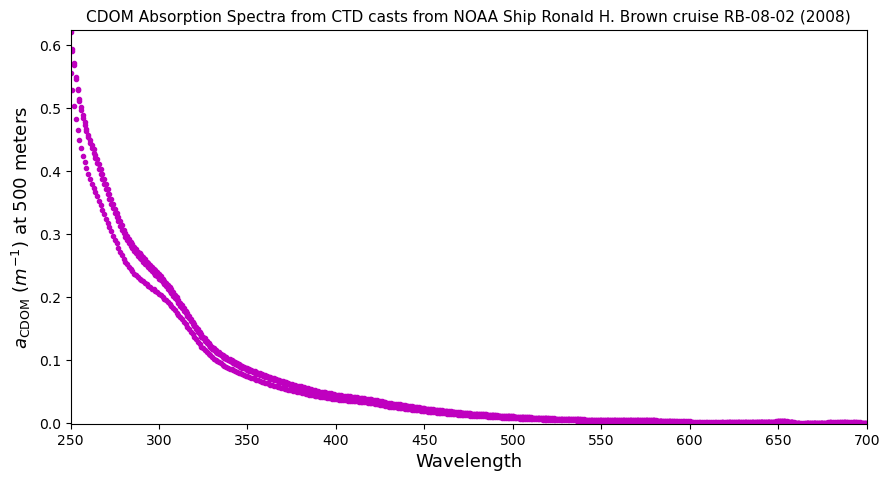

In [ ]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo



df = pd.read_csv('../NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_500m"]]  #df.loc['250':'700', ['Wavelength', 'ag_500m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_500m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 500 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_500m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'m.')